In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['species'] = encoder.fit_transform(df['species'])

In [9]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [10]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [11]:
df.sample(5)

,sepal_width,petal_length,species
57,2.4,3.3,1
128,2.8,5.6,2
142,2.7,5.1,2
102,3.0,5.9,2
98,2.5,3.0,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

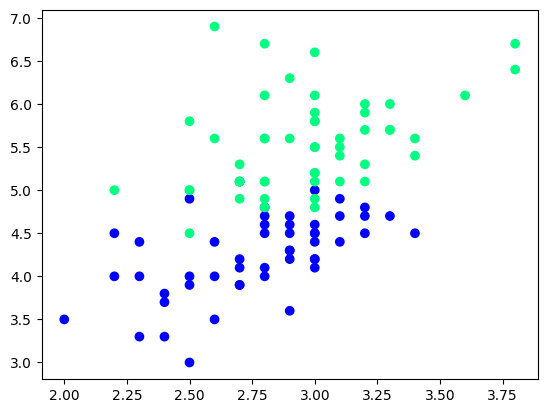

In [13]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [14]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
52,3.1,4.9,1
97,2.9,4.3,1
101,2.7,5.1,2
98,2.5,3.0,1
65,3.1,4.4,1
66,3.0,4.5,1
91,3.0,4.6,1
62,2.2,4.0,1
84,3.0,4.5,1
90,2.6,4.4,1


In [15]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [16]:
df_train

,sepal_width,petal_length,species
74,2.9,4.3,1
62,2.2,4.0,1
83,2.7,5.1,1
54,2.8,4.6,1
84,3.0,4.5,1
133,2.8,5.1,2
50,3.2,4.7,1
122,2.8,6.7,2
80,2.4,3.8,1
75,3.0,4.4,1


In [17]:
df_val

,sepal_width,petal_length,species
73,2.8,4.7,1
78,2.9,4.5,1
67,2.7,4.1,1
95,3.0,4.2,1
137,3.1,5.5,2


In [18]:
df_test

,sepal_width,petal_length,species
82,2.7,3.9,1
124,3.3,5.7,2
145,3.0,5.2,2
89,2.5,4.0,1
148,3.4,5.4,2


In [19]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [20]:
y_test

array([1, 1, 1, 1, 2])

# Case 1 - Bagging

In [21]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
74,2.9,4.3,1
75,3.0,4.4,1
74,2.9,4.3,1
54,2.8,4.6,1
80,2.4,3.8,1
50,3.2,4.7,1
62,2.2,4.0,1
122,2.8,6.7,2


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [23]:
dt_bag1 = DecisionTreeClassifier()

In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


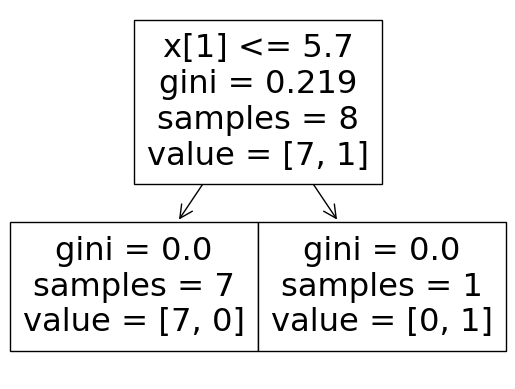

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


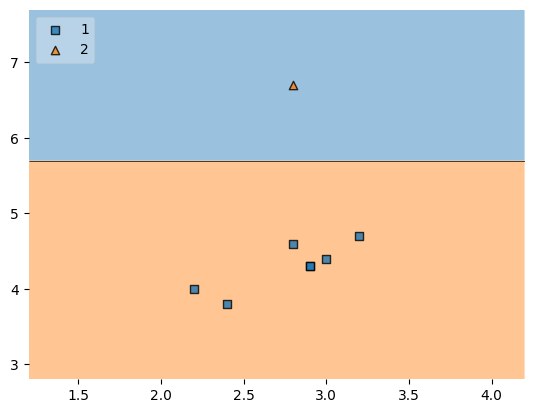

In [25]:
evaluate(dt_bag1,X,y)

In [26]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
50,3.2,4.7,1
84,3.0,4.5,1
62,2.2,4.0,1
62,2.2,4.0,1
80,2.4,3.8,1
75,3.0,4.4,1
62,2.2,4.0,1
74,2.9,4.3,1


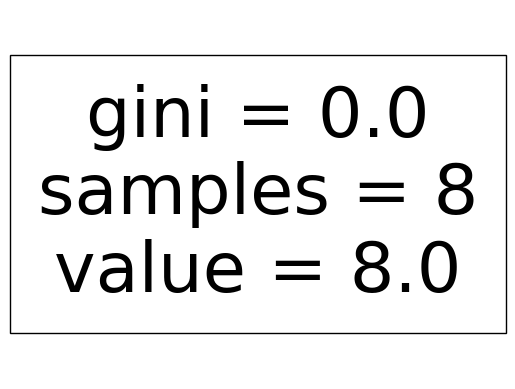

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


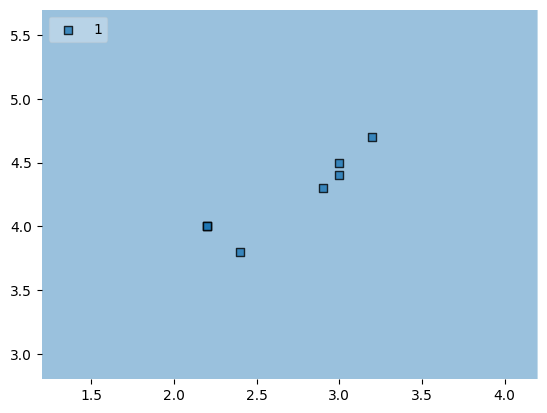

In [27]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [28]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
84,3.0,4.5,1
84,3.0,4.5,1
50,3.2,4.7,1
122,2.8,6.7,2
50,3.2,4.7,1
80,2.4,3.8,1
84,3.0,4.5,1
75,3.0,4.4,1


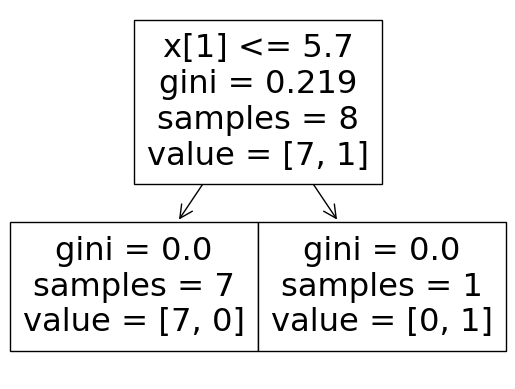

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


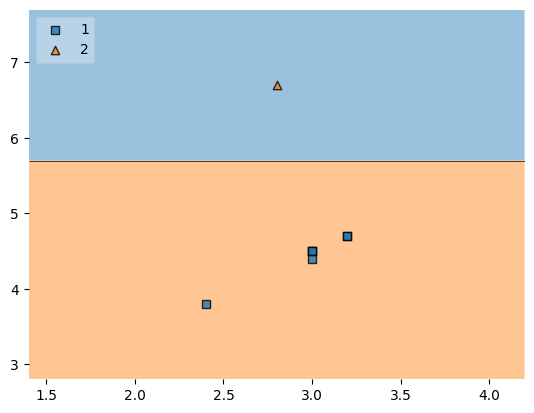

In [29]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [30]:
df_test

,sepal_width,petal_length,species
82,2.7,3.9,1
124,3.3,5.7,2
145,3.0,5.2,2
89,2.5,4.0,1
148,3.4,5.4,2


In [31]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [32]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
74,2.9,4.3,1
62,2.2,4.0,1
83,2.7,5.1,1
54,2.8,4.6,1
84,3.0,4.5,1
133,2.8,5.1,2
50,3.2,4.7,1
122,2.8,6.7,2
80,2.4,3.8,1
75,3.0,4.4,1


In [33]:
df_train.sample(8)

,sepal_width,petal_length,species
50,3.2,4.7,1
62,2.2,4.0,1
133,2.8,5.1,2
122,2.8,6.7,2
54,2.8,4.6,1
83,2.7,5.1,1
74,2.9,4.3,1
80,2.4,3.8,1


# Random Subspaces

In [34]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [35]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
25,5.0,3.0,1.6,0.2,setosa
69,5.6,2.5,3.9,1.1,versicolor
74,6.4,2.9,4.3,1.3,versicolor
23,5.1,3.3,1.7,0.5,setosa
46,5.1,3.8,1.6,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
123,6.3,2.7,4.9,1.8,virginica
79,5.7,2.6,3.5,1.0,versicolor
102,7.1,3.0,5.9,2.1,virginica
140,6.7,3.1,5.6,2.4,virginica


In [36]:
df1.sample(2,replace=True,axis=1)

,sepal_length,petal_width
25,5.0,0.2
69,5.6,1.1
74,6.4,1.3
23,5.1,0.5
46,5.1,0.2
24,4.8,0.2
123,6.3,1.8
79,5.7,1.0
102,7.1,2.1
140,6.7,2.4


# Random Patches

In [37]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
25,5.0,3.0,1.6,0.2,setosa
69,5.6,2.5,3.9,1.1,versicolor
74,6.4,2.9,4.3,1.3,versicolor
23,5.1,3.3,1.7,0.5,setosa
46,5.1,3.8,1.6,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
123,6.3,2.7,4.9,1.8,virginica
79,5.7,2.6,3.5,1.0,versicolor
102,7.1,3.0,5.9,2.1,virginica
140,6.7,3.1,5.6,2.4,virginica


In [38]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,sepal_length
123,4.9,6.3
79,3.5,5.7
25,1.6,5.0
102,5.9,7.1
79,3.5,5.7
123,4.9,6.3
69,3.9,5.6
69,3.9,5.6
